In [2]:

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [4]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [9]:
speciesDict = {0: 'setosa', 1:'versicolor', 2:'virginica'}
df.loc[:,'target'] = df.loc[:,'target'].apply(lambda x:speciesDict[x])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [15]:
x = df.loc[:, features].values
y = df.loc[:, ['target']].values

In [16]:
x = StandardScaler().fit_transform(x)

In [17]:

pca = PCA(n_components =2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal components 2'])


In [19]:
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

KeyError: 'principal component 2'

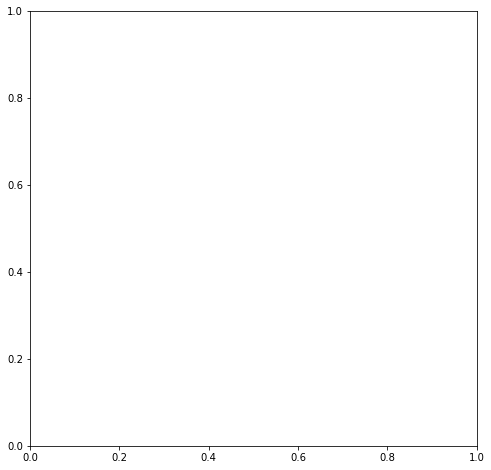

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
targets = df.loc[:, 'target'].unique()
colors = ['r', 'g','b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s= 50)
ax.set_xlabal('Principal Component 1', fontsize = 16)
ax.set_ylabel('Principal Component 2' , fontsize = 16)
ax.set_title('2 Component PCA',fontsize = 20)
ax.legend(targets)
ax.grid()